In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
bd = 'Cleaned_data'

In [3]:
mep_info6 = pd.read_csv(os.path.join(bd,'EP6_clean_data','mep_info_EP_6.csv'))
vote6 = pd.read_csv(os.path.join(bd,'EP6_clean_data','votes_EP_6.csv'))

mep_info7 = pd.read_csv(os.path.join(bd,'EP7_clean_data','mep_info_EP_7.csv'))
vote7 = pd.read_csv(os.path.join(bd,'EP7_clean_data','votes_EP_7.csv'))

mep_info8 = pd.read_csv(os.path.join(bd,'EP8_clean_data','mep_info_EP_8.csv'))
vote8 = pd.read_csv(os.path.join(bd,'EP8_clean_data','votes_EP_8.csv'))

mep_info9 = pd.read_csv(os.path.join(bd,'EP9_clean_data','mep_info_EP_9.csv'))
vote9 = pd.read_csv(os.path.join(bd,'EP9_clean_data','votes_EP_9.csv'))

In [4]:

all_unique_values = np.unique(vote9.values)

In [5]:

choose_columns = ['MepId','Country','EPG','Gender']

In [6]:
mep_info6 = mep_info6[choose_columns]
vote6 = pd.merge(vote6,mep_info6,on="MepId",how="left")

In [7]:
mep_info7 = mep_info7[choose_columns]
vote7 = pd.merge(vote7,mep_info7,on="MepId",how="left")

In [8]:
mep_info8 = mep_info8[choose_columns]
vote8 = pd.merge(vote8,mep_info8,on="MepId",how="left")

In [9]:
mep_info9 = mep_info9[choose_columns]
vote9 = pd.merge(vote9,mep_info9,on="MepId",how="left")

In [10]:
vote9.Vote = vote9['Vote'].astype('Int64')

In [11]:
def recode(vote):
    match vote:
        case 0:
            return vote
        case 1:
            return vote
        case 2:
            return vote
        case 3:
            return vote
        case 4:
            return 4 
        case 5:
            return 4
        case 6:
            return 4
    return 0

In [12]:
vote6.Vote = vote6['Vote'].apply(recode)
vote7.Vote = vote7['Vote'].apply(recode)
vote8.Vote = vote8['Vote'].apply(recode)
vote9.Vote = vote9['Vote'].apply(recode)

In [13]:
vote6['Gender'] = vote6['Gender'].apply(lambda x: 'MALE' if x == 'NAP' else x)

In [14]:
vote6.to_csv(os.path.join('Results','votes_plotly_6.csv'),index=False)
vote7.to_csv(os.path.join('Results','votes_plotly_7.csv'),index=False)
vote8.to_csv(os.path.join('Results','votes_plotly_8.csv'),index=False)
vote9.to_csv(os.path.join('Results','votes_plotly_9.csv'),index=False)

In [15]:
vote6missing = vote6[vote6.Vote == 4]
vote7missing = vote7[vote7.Vote == 4]
vote8missing = vote8[vote8.Vote == 4]
vote9missing = vote9[vote9.Vote == 4]

In [16]:
value_counts6 = vote6missing['EPG'].value_counts()
value_counts7 = vote7missing['EPG'].value_counts()
value_counts8 = vote8missing['EPG'].value_counts()
value_counts9 = vote9missing['EPG'].value_counts()

In [17]:
def proportions_plot(df, ep_number):
    epg_counts = df['EPG'].value_counts()
    epg_4_votes = df[df['Vote'] == 4]['EPG'].value_counts()
    proportions = epg_4_votes / epg_counts

    # Plot
    plt.figure(figsize=(10, 6))
    proportions.plot(kind='bar')
    plt.title(f"Proportion of missing votes by EPG in EP{ep_number}")
    plt.xlabel('EPG')
    plt.ylabel('Proportion of missing votes')
    plt.savefig(os.path.join('Graphs',f'proportion_of_missing_votes_by_EPG_EP{ep_number}.png'))
    plt.show()

In [19]:
def genders_plot(df, ep_number):
    epg_counts = df['Gender'].value_counts()
    epg_4_votes = df[df['Vote'] == 4]['Gender'].value_counts()
    proportions = epg_4_votes / epg_counts

    # Plot
    plt.figure (figsize=(10, 10))
    proportions.plot(kind='bar')
    plt.title(f"Proportion of missing votes by EPG in EP{ep_number}")
    plt.xlabel('Gender')
    plt.ylabel('Proportion of missing votes')
    plt.savefig(os.path.join('Graphs',f'proportion_of_missing_votes_by_gender_EP{ep_number}.png'))
    plt.show()

In [20]:
def countries_plot(df, ep_number):
    epg_counts = df['Country'].value_counts()
    epg_4_votes = df[df['Vote'] == 4]['Country'].value_counts()
    proportions = epg_4_votes / epg_counts

    # Plot
    plt.figure(figsize=(10, 6))
    proportions.plot(kind='bar')
    plt.title(f"Proportion of missing votes by country in EP{ep_number}")
    plt.xlabel('Country')
    plt.ylabel('Proportion of missing votes')
    plt.savefig(os.path.join('Graphs',f'proportion_of_missing_votes_by_country_EP{ep_number}.png'))
    plt.show()

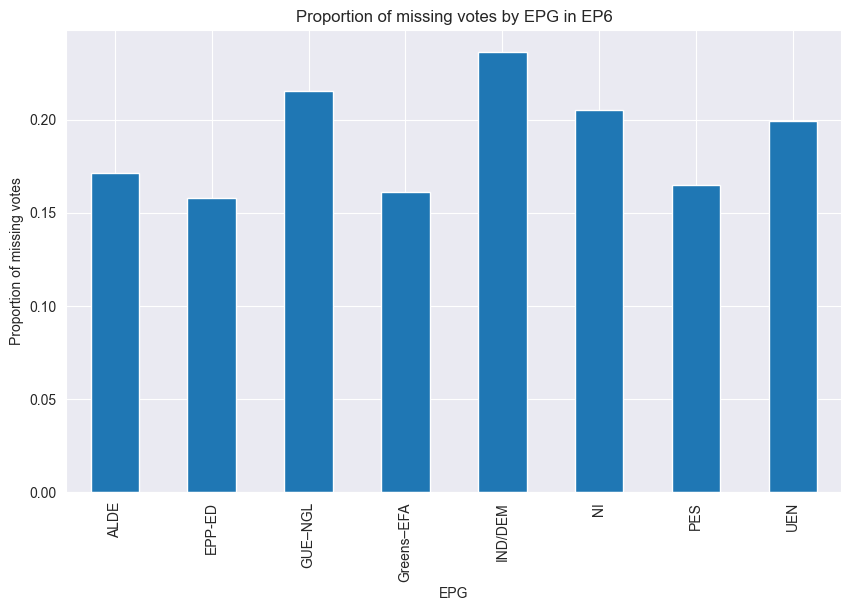

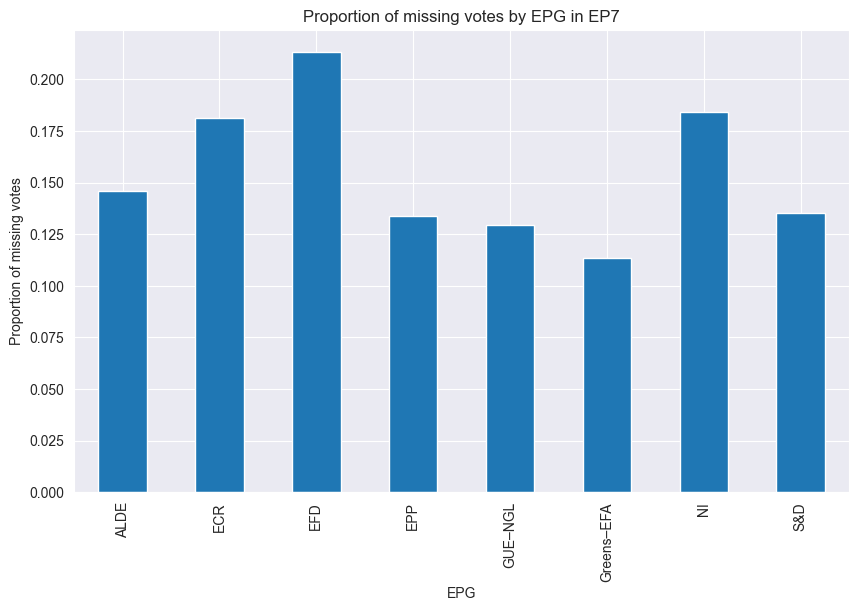

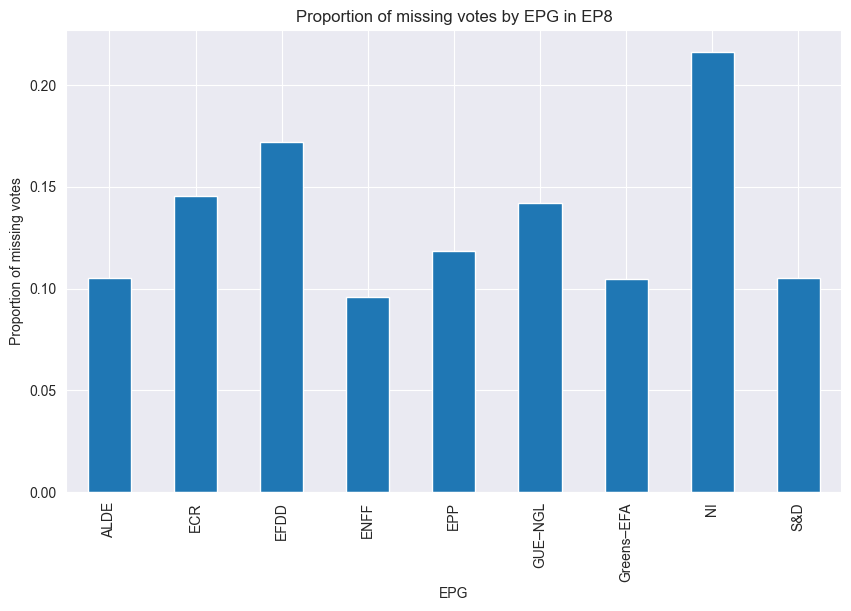

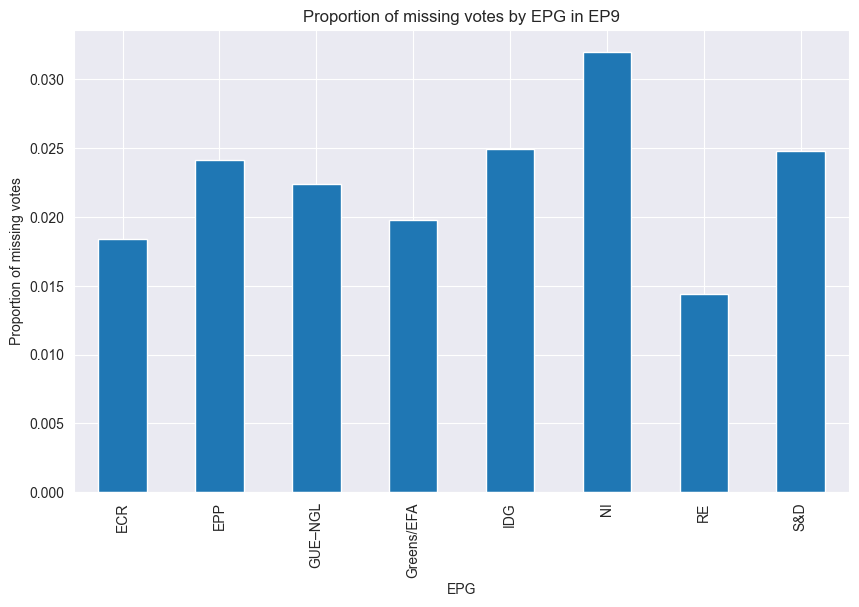

In [21]:
proportions_plot(vote6,6)
proportions_plot(vote7,7)
proportions_plot(vote8,8)
proportions_plot(vote9,9)


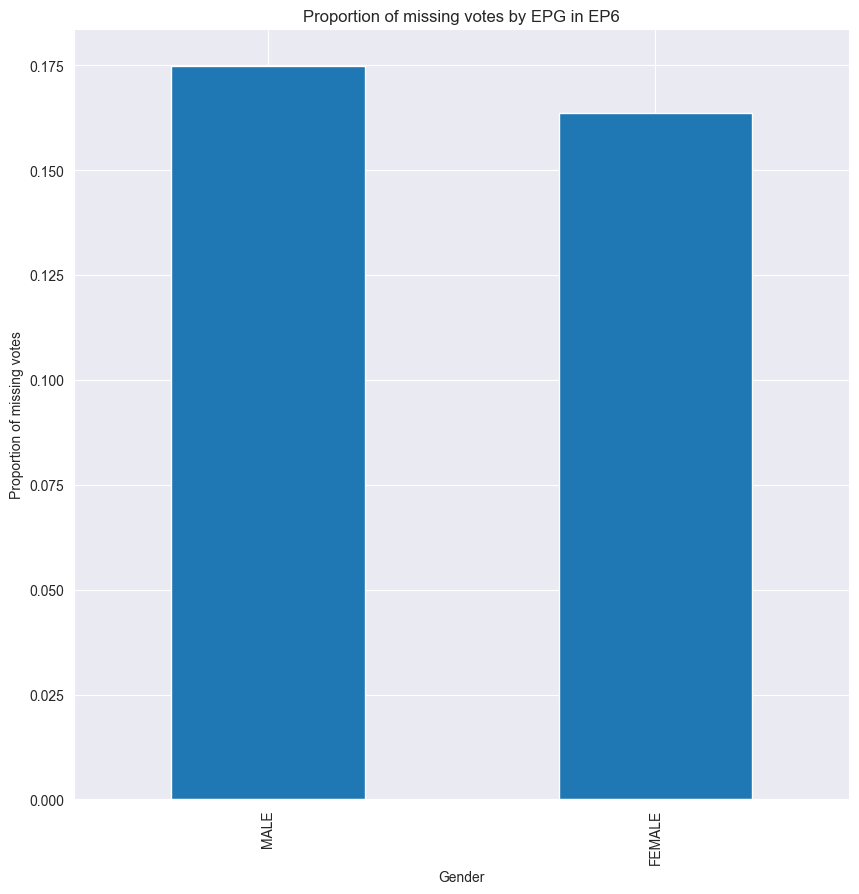

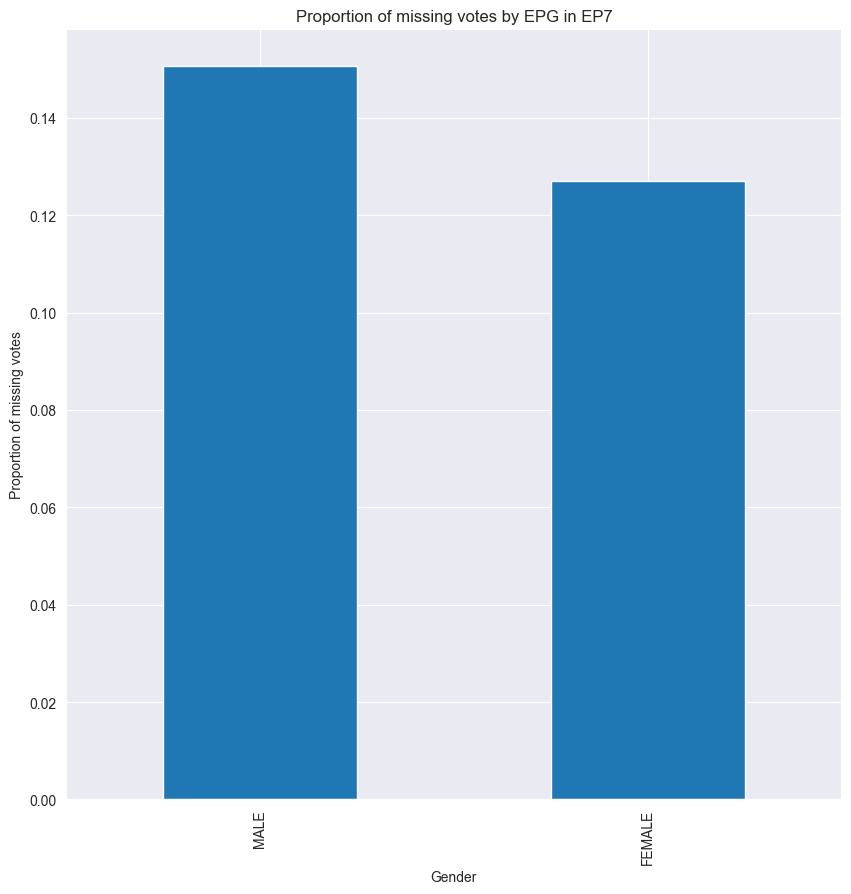

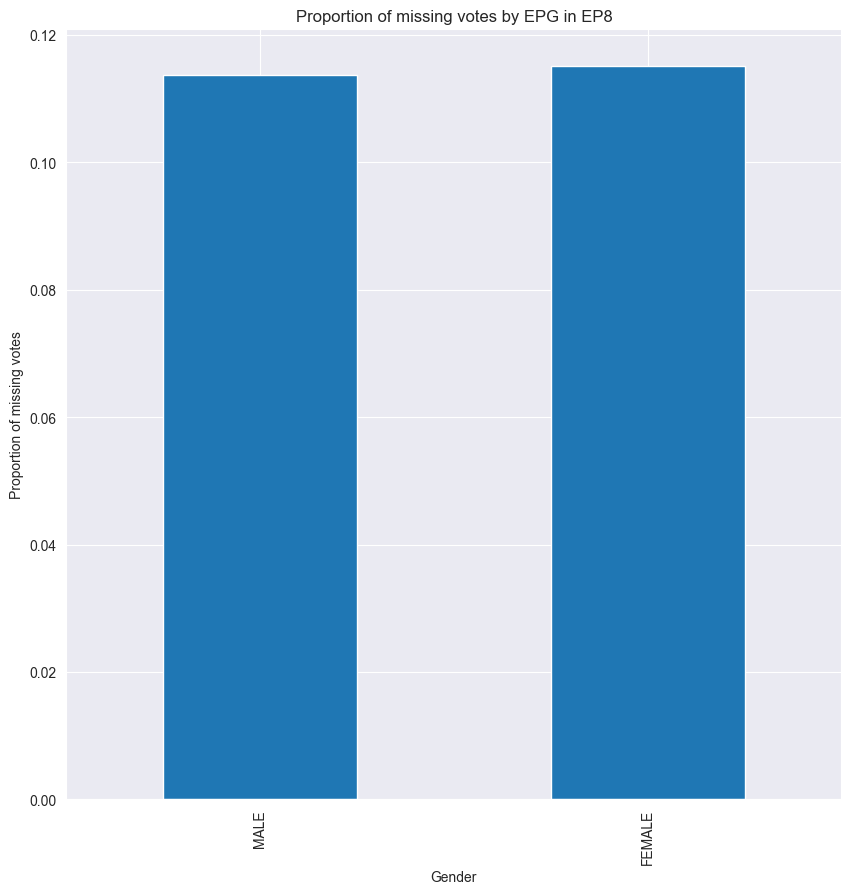

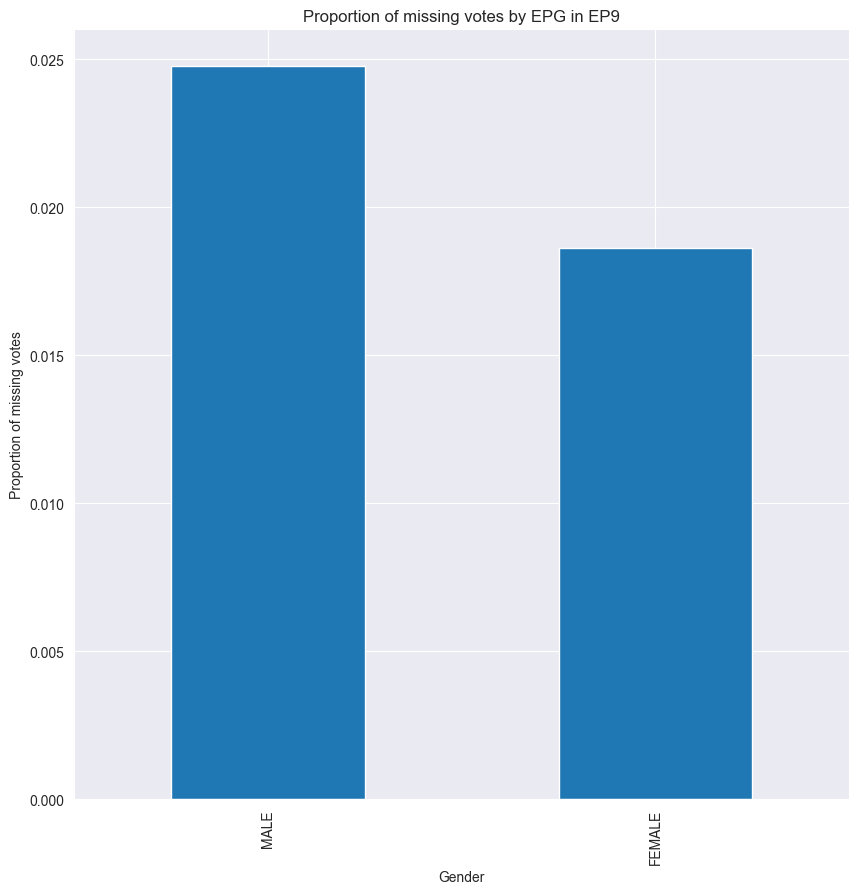

In [22]:
genders_plot(vote6,6)
genders_plot(vote7,7)
genders_plot(vote8,8)
genders_plot(vote9,9)

In [ ]:
countries_plot(vote6,6)
countries_plot(vote7,7)
countries_plot(vote8,8)
countries_plot(vote9,9)

In [ ]:
def heatmap(df, ep_number):
    
    df['MissingVote'] = df['Vote'] == 4
    pivot_table = pd.pivot_table(df, values='MissingVote', index='Gender', columns='EPG', aggfunc=np.mean)

    # Plotting the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='.2f')
    plt.title(f'Proportion of Missing Votes by Gender and EPG in EP{ep_number}')
    plt.savefig(os.path.join('Graphs',f'heatmap_proportion_of_missing_votes_by_gender_and_epg_EP{ep_number}.png'))
    plt.show()

In [ ]:
def heatmap_country(df, ep_number):
    
    df['MissingVote'] = df['Vote'] == 4
    pivot_table = pd.pivot_table(df, values='MissingVote', index='Country', columns='EPG', aggfunc=np.mean)

    # Plotting the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='.2f')
    plt.title(f'Proportion of Missing Votes by Country and EPG in EP{ep_number}')
    plt.savefig(os.path.join('Graphs',f'heatmap_proportion_of_missing_votes_by_country_and_epg_EP{ep_number}.png'))

    plt.show()

In [ ]:
heatmap(vote6,6)
heatmap(vote7,7)
heatmap(vote8,8)
heatmap(vote9,9)

In [ ]:
heatmap_country(vote6,6)
heatmap_country(vote7,7)
heatmap_country(vote8,8)
heatmap_country(vote9,9)